# Aprendizado Supervisionado

## Testando modelos: base de treino e teste

Terminamos o tutorial passado avaliando os modelos construídos. No entanto, os testes foram realizados a partir da mesma base que foi utilizada para realizar o treinamento. É fácil perceber que essa não é uma abordagem interessante. Fazendo uma analogia, é como se estivéssemos avaliando nossos alunos com um prova que era igual a uma lista de exercício passada antes de prova. 

A principal questão quando estamos testando modelos em aprendizagem de máquina é garantir que nosso modelo seja capaz de generalizar o suficiente para que consiga acertar bem instâncias ainda desconhecidas. 

Quando treinamos e testamos nosso modelo com a mesma base, caímos no risco de construir um modelo que não seja capaz de generalizar aquele conhecimento adquirido. Normalmente, quando isso acontece, lidamos com um problema chamado de overfit. O correto é treinarmos nosso modelo com uma base e testar com um conjunto de dados novo para o modelo. Desta forma, aumentamos as chances de construir um modelo capaz de generalizar o "conhecimento" extraído da base de dados.

Na verdade, esse problema está relacionado com dois problemas clássicos da aprendizagem de máquina *underfitting* e *overfitting*. Vamos trabalhar melhor estes dois conceitos mais a frente no nosso curso.

Treinar e testar com bases distintas consiste em selecionar nosso dataset e dividi-lo em duas partes: (1) uma base de treinamento e (2) uma base de teste. Desta forma podemos treinar e testar com base distintas, mas também podemos avaliar se o nosso modelo aprendeu de fato já que a classe de cada instância da base de teste é conhecida. A ** acurácia de teste ** é uma estimativa melhor do que a ** acurácia de treinamento ** já que avalia a performance do modelo em um conjunto de dados desconhecido.

Vamos trabalhar com a base da Iris também. 

In [14]:
#Imports necessários
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_iris = load_iris()
X = data_iris.data
y = data_iris.target

# Criando um teste que consiste em 40% dos dados originais
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=4)


#Imprimindo o tamanho das bases
print("Tamanho de X na base de Treino: ", X_train.shape)
print("Tamanho de X na base de Teste: ", X_test.shape)

print("Tamanho de Y na base de Treino: ", Y_train.shape)
print("Tamanho de Y na base de Teste: ", Y_test.shape)

Tamanho de X na base de Treino:  (90, 4)
Tamanho de X na base de Teste:  (60, 4)
Tamanho de Y na base de Treino:  (90,)
Tamanho de Y na base de Teste:  (60,)


Agora vamos analisar os modelos do KNN utilizando K=3 e K=10, mas calculando a acurácia na base de teste.

In [4]:
#Instanciando e treinando os modelos

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, Y_train)

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [5]:
# Fazendo a predição para base de teste
pred_test_3 = knn_3.predict(X_test)
pred_test_10 = knn_10.predict(X_test)

In [6]:
from sklearn import metrics
#Calculando a acurácia
print("Acurácia de teste para K=3:", '%0.4f' % metrics.accuracy_score(Y_test, pred_test_3))
print("Acurácia de teste para K=10:", '%0.4f' % metrics.accuracy_score(Y_test, pred_test_10))

Acurácia de teste para K=3: 0.9667
Acurácia de teste para K=10: 0.9833


Apesar de ter dado valores bem parecidos, essa acurácia representa melhor o modelo que foi criado já que este foi testado com dados diferentes daqueles que foram utilizados para treina-lo.

## Validação Cruzada

A forma como testamos o modelo criado é válido, mas existe uma forma mais interessante de testar nosso modelo para garantir a sua capacidade de generalizar. Isso é chamado de Validação Cruzada (*cross-validation*). Esse tipo de validação prover uma estimativa mais confiável e, consequentemente, uma maneira mais adequada para escolher o modelo que melhor generaliza os dados coletados. 

O princípio da validação cruzada é simples: dividimos a base em Treino e Teste e testamos nosso modelo (M). Em seguida, fazemos uma nova divisão em teste e treino e aplicamos novamente o modelo. Repetimos esse processo um número $x$ de vezes (*fold*). O resultado final do modelo é dado pela média dos valores encontrados em cada configuração da base. 

A imagem a seguir ilustra esse processo para uma divisão de 20% para teste e 80% para treino. Utilizamos 5 *folds* para ilustrar. Acc0 indica a acurácia do fold 0, Acc1 a acurácia do fold 1 e assim por diante.

<img src="https://dl.dropboxusercontent.com/u/25405260/imagens/crossvalidation.png" width="60%" />

Observe que para cada *fold* o conjunto de dados de treino/teste é diferente.

Vamos executar a validação cruzada no ScikitLearn. A biblioteca possui o método **cross_val_score** do pacaote **sklearn.model_selection** que treina e testa o modelo usando validação cruzada.

In [11]:
# Importa o método de valiação cruzada 
from sklearn.model_selection import cross_val_score

# Aplica a validação cruzada (5 folds) no modelo KNN (k=3) criado anteriomente
scores_3 = cross_val_score(knn_3, X, y, cv=5, scoring='accuracy')

# Aplica a validação cruzada (5 folds) no modelo KNN (k=10) criado anteriormente
scores_10 = cross_val_score(knn_10, X, y, cv=5, scoring='accuracy')

print("Média da Acurácia KNN (K=3): ", "%0.3f" % scores_3.mean())
print("Média da Acurácia KNN (K=10): ", "%0.3f" %  scores_10.mean())

Média da Acurácia KNN (K=3):  0.967
Média da Acurácia KNN (K=10):  0.980


O parâmetro **scores** do método **cross_val_score** refere-se ao tipo de métrica que será utilizada para avaliar nosso modelo. No caso da classificação, vamos utilizar a acurácia (que corresponde a porcentagem de instâncias classificadas corretamente). Vale ressaltar que possuem várias métricas que podem ser utilizadas na classificação. Elas serão melhor trabalhadas mais adiante no curso. 

## Exemplo 1

Vamos calcular o melhor valor de K para a base da Iris treinando nosso modelo com validação cruzada de 5 folds. 

O valor de k vai ser variado de 1 até 25. O resultado será plotado em um gráfico. 

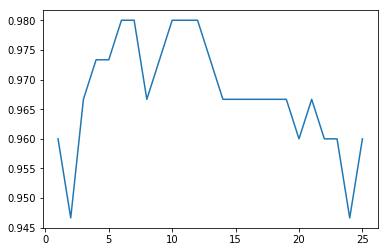

In [20]:
k_range = list(range(1, 26))

scores = []

maior_k = 0.0
maior_acc = 0.0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    mean_score = score.mean()
    
    if mean_score > maior_acc:
        maior_k = k
        maior_acc = mean_score
    
    scores.append(score.mean())
    
plt.plot(k_range, scores)

In [21]:
print("Maior valor de K = ", maior_k)
print("Maior valor de Acurácia = ", maior_acc)

Maior valor de K =  6
Maior valor de Acurácia =  0.98


## Exemplo 2

Vamos voltar para o exemplo que utilizamos no tutorial de **Regressão Linear**. O modelo utilizava informações de gastos de propaganda em Rádio, TV e Jornal para dar uma estimativa de vendas de um determinado produto. Vamos utilizar agora a validação para testar diferentes modelos de Regressão Linear. 

Vamos utilizar a base de dados de três formas diferentes: 

1. Utilizando somente a *feature* TV
2. Utilizando as *features* TV e Radio
3. Utilizando todas as *features* (TV, Radio e Newspaper)

Já tinha comentado anteriormente que o atributo Newspaper não contribui positivamente com as vendas. Vamos mostrar isso treinando três modelos distintos e calculando a acurácia na validação cruzada com 10 *folds*

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Carrega a base de dados
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [27]:
# Definindo as features que serão usadas para cada base 
feature_cols_1 = ['TV']
feature_cols_2 = ['TV', 'Radio']
feature_cols_3 = ['TV', 'Radio', 'Newspaper']

# Criando os dados de entrada  
X_1 = data[feature_cols_1] # Corresponde aos dados só com a feature TV
X_2 = data[feature_cols_2] # Corresponde aos dados com as features TV e Radio
X_3 = data[feature_cols_3] # Corresponde aos dados com as features TV, Radio e Newspaper

# Valores de Y. Lembrando que esse valor é igual para as três bases
y = data.Sales

#Instanciando os modelos 

lm_1 = LinearRegression()
lm_2 = LinearRegression()
lm_3 = LinearRegression()


#Validação cruzada de 10 folds. Observe que mudamos o parâmetro scoring para atender à técnica que estamos utilizando.
scores_1 = cross_val_score(lm_1, X_1, y, cv=10, scoring='r2')
scores_2 = cross_val_score(lm_2, X_2, y, cv=10, scoring='r2')
scores_3 = cross_val_score(lm_3, X_3, y, cv=10, scoring='r2')

# Resultados obtidos com a métrica R^2
print("R2 Model 1: %0.6f" % (scores_1.mean()))
print("R2 Model 2: %0.6f" % (scores_2.mean()))
print("R2 Model 3: %0.6f" % (scores_3.mean()))

R2 Model 1: 0.568697
R2 Model 2: 0.886967
R2 Model 3: 0.885356


Analisando os resultados, temos que o segundo modelo que usa apenas TV e Rádio tem o maior valor de $R^2$. O fato de considerar o atributo newspaper não implica em uma mudança tão grande nos resultados. 

Com isso fechamos esse tutorial. Assim que aprendermos mais modelos vamos realizar testes mais completos para avaliar os modelos implementados. O intuito deste tutorial foi mostrar uma boa ferramenta de testes que é a validação cruzada.

**Até o próximo tutorial ;)**